In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

In [17]:
data_dos = np.loadtxt('../dos/graphene-dos.dat')
fermi_energy = 0.617

energy = data_dos[:,0] - fermi_energy
dos = data_dos[:,1]

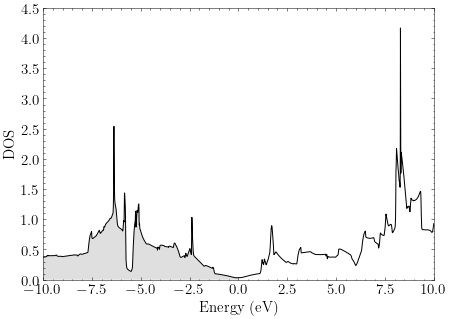

In [31]:
plt.plot(energy, dos, c='k')
plt.xlim(-10,10)
plt.ylim(0, 4.5)
plt.xlabel('Energy (eV)')
plt.ylabel('DOS')
plt.fill_between(x=energy, y1=0, y2=dos, where=(energy < 0), facecolor='grey', alpha=0.25)
plt.show()